In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# <font color=black> __________________________________________________________________________________________________ </font>
# <font color=blue> Get <font color=green> **NZ output** </font> file details </font>

##### <font color=blue> Get the  <font color=red> **LOCAL WF** </font> file </font>

In [2]:
EXP         = 'NZrerun.OG.NZ.TG'
FILENAME1   = '{arg1}.total.workflow.wf1e.local.nc'.format(arg1=EXP)
PATH        = '/scratch/pk695/FACTS/002_fork/facts/experiments-pkjr002/{arg1}/output/'.format(arg1=EXP)
#
d_nc        = xr.open_dataset(PATH + FILENAME1)
d_nc

<xarray.Dataset>
Dimensions:           (samples: 2000, years: 9, locations: 14)
Coordinates:
  * years             (years) int64 2020 2030 2040 2050 2060 2070 2080 2090 2100
  * locations         (locations) int64 150 213 217 221 ... 1065 1590 1643 1750
  * samples           (samples) int64 0 1 2 3 4 5 ... 1995 1996 1997 1998 1999
Data variables:
    sea_level_change  (samples, years, locations) float32 ...
    lat               (locations) float64 ...
    lon               (locations) float64 ...
Attributes:
    description:  Total sea-level change for workflow
    history:      Created Mon Feb  6 11:49:09 2023
    source:       FACTS: Post-processed total among available contributors: /...

# <font color=black> __________________________________________________________________________________________________ </font>
# <font color=blue> PLOT: Spatial <font color=red> **TG** </font> Rates </font>

In [5]:
longitude = d_nc['lon'].to_dataframe().values
latitude = d_nc['lat'].to_dataframe().values
#

df_TEMP = []
YEAR        = 2100
percentList = [50] #, 17, 83] 
Yind        = np.where(d_nc["years"].values == YEAR)[0][0]
LOC         = d_nc.coords['locations'].values
#
for ind,loc in enumerate(LOC):
    # Loop over stations
    GMSL        = (d_nc["sea_level_change"][:,Yind,ind].values)/1000
    # Find Percentiles.
    pcntle   = np.percentile(GMSL[:], percentList );    pcntle = np.around(pcntle,2)
    df_TEMP.append( [latitude[ind],longitude[ind], ] + pcntle.tolist() )
df_ptile = pd.DataFrame( df_TEMP, columns=['lat','lon', ] + [ f'col_{x}' for xi, x in enumerate( percentList )] )
df_ptile

,lat,lon,col_50
0,[-36.84],[174.77],0.90
1,[-46.6],[168.35],0.63
2,[-36.84],[174.77],0.90
3,[-41.28],[174.78],1.07
4,[-43.61],[172.72],0.85
5,[-43.61],[172.72],0.85
6,[-41.28],[174.78],1.07
7,[-41.26],[173.27],0.98
8,[-39.06],[174.03],0.69
9,[-44.39],[171.26],0.75


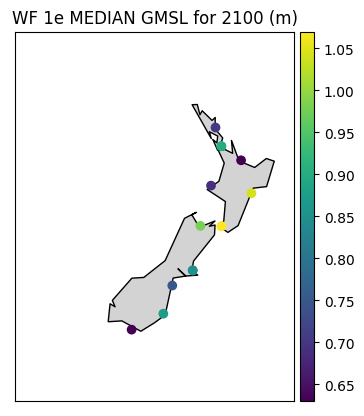

In [12]:
# Latitude and longitude values for NZ
min_lon = 160.0
max_lon = 180.0
min_lat = -50.0
max_lat = -30.0

# Create the map
m = Basemap(projection='merc', llcrnrlat=min_lat, urcrnrlat=max_lat, llcrnrlon=min_lon, urcrnrlon=max_lon, resolution='c')
m.drawcoastlines()
m.fillcontinents(color='lightgray', lake_color='lightblue')
# m.scatter(longitude, latitude, latlon=True, marker='.', color='red', zorder=5)
sc = m.scatter(longitude, latitude, latlon=True, marker='o', c=df_ptile.col_50, zorder=15)
cbar = m.colorbar(sc)

plt.title("WF 1e MEDIAN GMSL for 2100 (m)")


plt.show()